In [24]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.express as px

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [6]:
## mount the drive
from google.colab import drive
drive.mount('/content/drive')
PROJ_DIR = '/content/drive/MyDrive/HM/'
%cd $PROJ_DIR
! ls

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1HIjrgz2KrB4wLCZasrYeKTXkE-b6--I_/HM
 data			       __pycache__
'H&M_EDA_articles.ipynb'       replay_buffer.py
'H&M_EDA_customer.ipynb'       report_SNQN_FeatureVec.txt
'H&M_EDA.ipynb'		       SASRecModules.py
'H&M_EDA_transactions.ipynb'   SNQN_new.py
 NextItNetModules.py	       SNQN.py
 pop_dict.txt		       SNQN_RR_FeatureVec_new.py
 pop.py			       SNQN_RR_FeatureVec.py
 pre_processing.py	       utility.py


In [7]:
events_df = pd.read_csv(os.path.join(PROJ_DIR,'data/transactions_train_small.csv'))
articles_df = pd.read_csv(os.path.join(PROJ_DIR,'data/articles.csv'))
customers_df = pd.read_csv(os.path.join(PROJ_DIR,'data/customers.csv'))

In [8]:
events_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2020-05-12,7b097346bea50d033a261dfb35f862fdf71708b732168d...,562245098,0.025407,1
1,2020-05-12,7b0ccda4924947274ce2e1a5575b123e69f104a2a195ae...,783346016,0.025407,1
2,2020-05-12,7b0ccda4924947274ce2e1a5575b123e69f104a2a195ae...,766346008,0.025407,1
3,2020-05-12,7b0ccda4924947274ce2e1a5575b123e69f104a2a195ae...,783346001,0.025407,1
4,2020-05-12,7b0e69ec21e7b270dc9b00becf3afcc76369072bed13ed...,783802003,0.084729,2


In [9]:
articles_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [10]:
customers_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [11]:
print('The events dataset has {} observations and {} features'.format(events_df.shape[0],events_df.shape[1]))
print('The articles dataset has {} observations and {} features'.format(articles_df.shape[0],articles_df.shape[1]))
print('The customer dataset has {} observations and {} features'.format(customers_df.shape[0],customers_df.shape[1]))

The events dataset has 6134281 observations and 5 features
The articles dataset has 105542 observations and 25 features
The customer dataset has 1371980 observations and 7 features


In [13]:
print('The null values in each dataframe \n')
print('Events dataframe:')
print(events_df.isnull().sum())
print('\n')
print('Articles dataframe:')
print(articles_df.isnull().sum())
print('\n')
print('Customer dataframe:')
print(customers_df.isnull().sum())

The null values in each dataframe 

Events dataframe:
t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64


Articles dataframe:
article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_g

In [14]:
## we can drop the columns customer_id and FN as they have more than 50% of the data missing
customers_df.drop(['Active','FN'],axis = 1, inplace = True)

## Since the group number is the same as group name, we can drop the group no column before training
articles_df.drop('garment_group_no',axis = 1, inplace = True)

## Similary we can drop the features which are the names and just keep the integer codes for the same
articles_df.drop(['product_code','product_type_no','graphical_appearance_no',
                  'colour_group_code','index_code','index_group_no','section_no',
                  'perceived_colour_value_id','perceived_colour_master_id','department_no'],axis = 1, inplace = True)

## we can also drop the description column as well
articles_df.drop('detail_desc',axis = 1,inplace = True)

Data Preprocessing - Customers Dataframe

In [15]:
customers_df.head()

,customer_id,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [17]:
customers_df['club_member_status'].value_counts()  

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64

In [18]:
customers_df['fashion_news_frequency'].value_counts() 

NONE         877711
Regularly    477416
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64

In [20]:
customers_df['fashion_news_frequency'].replace('None','NONE',inplace = True)

In [22]:
## Label encode the customer id and postal code
customer_encoder = LabelEncoder()
postal_encoder = LabelEncoder()
customers_df['customer_id'] = customer_encoder.fit_transform(customers_df.customer_id)
customers_df['postal_code'] = postal_encoder.fit_transform(customers_df.postal_code)


In [23]:
customers_df.head()

,customer_id,club_member_status,fashion_news_frequency,age,postal_code
0,0,ACTIVE,NONE,49.0,112978
1,1,ACTIVE,NONE,25.0,57312
2,2,ACTIVE,NONE,24.0,139156
3,3,ACTIVE,NONE,54.0,128529
4,4,ACTIVE,Regularly,52.0,52371


Data Analysis - Customers Dataframe

In [30]:
customers_df['age'].describe()

count    1.356119e+06
mean     3.638696e+01
std      1.431363e+01
min      1.600000e+01
25%      2.400000e+01
50%      3.200000e+01
75%      4.900000e+01
max      9.900000e+01
Name: age, dtype: float64

In [25]:
fig = px.scatter(customers_df, x='fashion_news_frequency', y='age', color='club_member_status')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Data Preprocessing - Articles 

In [26]:
df_encoded = articles_df.copy()

In [27]:
## we can label encode the prod_name
## one hot encode just the features
cols_to_ohe = ['product_type_name','product_group_name','graphical_appearance_name','colour_group_name',
               'perceived_colour_value_name','perceived_colour_master_name','department_name','index_name',
               'index_group_name','section_name','garment_group_name']

In [28]:
for col in cols_to_ohe:
    ohe = OneHotEncoder()
    ohe_encoding = ohe.fit_transform(df_encoded[col].values.reshape(-1,1)).toarray()
    encoded_df = pd.DataFrame(ohe_encoding, columns = ohe.get_feature_names_out([col]))
    df_encoded = pd.concat([df_encoded, encoded_df], axis=1)
    df_encoded.drop(col,axis = 1, inplace = True)

In [29]:
df_encoded.head()

,article_id,prod_name,product_type_name_Accessories set,product_type_name_Alice band,product_type_name_Baby Bib,product_type_name_Backpack,product_type_name_Bag,product_type_name_Ballerinas,product_type_name_Beanie,product_type_name_Belt,...,garment_group_name_Shorts,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,garment_group_name_Woven/Jersey/Knitted mix Baby
0,108775015,Strap top,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108775044,Strap top,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,108775051,Strap top (1),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,110065001,OP T-shirt (Idro),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,110065002,OP T-shirt (Idro),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
## Label Encoding the product names
product_encoder = LabelEncoder()
df_encoded['prod_name'] = product_encoder.fit_transform(df_encoded.prod_name)

In [32]:
article_encoder = LabelEncoder()
df_encoded['article_id'] = article_encoder.fit_transform(df_encoded.article_id)

In [33]:
df_encoded.shape

(105542, 602)

In [34]:
df_encoded.describe()

,article_id,prod_name,product_type_name_Accessories set,product_type_name_Alice band,product_type_name_Baby Bib,product_type_name_Backpack,product_type_name_Bag,product_type_name_Ballerinas,product_type_name_Beanie,product_type_name_Belt,...,garment_group_name_Shorts,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,garment_group_name_Woven/Jersey/Knitted mix Baby
count,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,...,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000
mean,52770.500000,23220.712361,0.000066,0.000057,0.000028,0.000057,0.012128,0.003525,0.000531,0.004340,...,0.014771,0.011882,0.021527,0.010053,0.026407,0.063738,0.029372,0.070503,0.036696,0.018618
std,30467.495393,13338.234922,0.008144,0.007540,0.005331,0.007540,0.109457,0.059264,0.023029,0.065732,...,0.120637,0.108353,0.145134,0.099759,0.160342,0.244286,0.168848,0.255994,0.188016,0.135173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26385.250000,11766.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,52770.500000,23509.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,79155.750000,34701.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,105541.000000,45874.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
df_encoded.nunique()

article_id                                          105542
prod_name                                            45875
product_type_name_Accessories set                        2
product_type_name_Alice band                             2
product_type_name_Baby Bib                               2
                                                     ...  
garment_group_name_Trousers                              2
garment_group_name_Trousers Denim                        2
garment_group_name_Under-, Nightwear                     2
garment_group_name_Unknown                               2
garment_group_name_Woven/Jersey/Knitted mix Baby         2
Length: 602, dtype: int64

Data preprocessing - Transactions

In [37]:
events_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2020-05-12,7b097346bea50d033a261dfb35f862fdf71708b732168d...,562245098,0.025407,1
1,2020-05-12,7b0ccda4924947274ce2e1a5575b123e69f104a2a195ae...,783346016,0.025407,1
2,2020-05-12,7b0ccda4924947274ce2e1a5575b123e69f104a2a195ae...,766346008,0.025407,1
3,2020-05-12,7b0ccda4924947274ce2e1a5575b123e69f104a2a195ae...,783346001,0.025407,1
4,2020-05-12,7b0e69ec21e7b270dc9b00becf3afcc76369072bed13ed...,783802003,0.084729,2


In [38]:
events_df.shape

(6134281, 5)

In [39]:
! python pre_processing.py --data='data'

2023-05-04 17:03:09.123704: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 17:03:11.230339: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Starting pre-processing of data
Completed data cleaning and generated sorted_events.csv file 

Sampled the dataset for training and test 


Script completed successfully!


In [40]:
! python replay_buffer.py --data='data'

2023-05-04 17:04:18.230329: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 17:04:19.156675: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Generating replay_buffer from sorted_events
There are 390704 ids to process
100% 390704/390704 [05:00<00:00, 1301.38it/s]
Generated the replay_buffer 

Generated the data_statis.df 


Script completed successfully!


In [41]:
! python pop.py --data='data'

Calculating the item popularity 
 
6.0
48.0
38.0
41.0
30.0
58.0
53.0
25.0
5.0
18.0
9.0
17.0
33.0
51.0
59.0
27.0
16.0
2.0
45.0
21.0
55.0
31.0
44.0
43.0
10.0
46.0
4.0
42.0
52.0
26.0
57.0
8.0
11.0
36.0
34.0
3.0
22.0
39.0
50.0
20.0
23.0
29.0
15.0
35.0
49.0
54.0
24.0
40.0
37.0
1.0
7.0
28.0
56.0
61.0
60.0


In [42]:
sampled_train = pd.read_pickle(os.path.join(PROJ_DIR,'data/sampled_train.df'))

In [43]:
sampled_train.head()

,t_dat,customer_id,article_id,price,is_buy
1070561,2020-06-03,0,3167,0.050831,1
1070562,2020-06-03,0,22483,0.033881,1
1070563,2020-06-03,0,20998,0.042356,1
4569036,2020-08-12,0,33709,0.027102,1
4569037,2020-08-12,0,10037,0.033881,1


In [44]:
eval_sessions=pd.read_pickle(os.path.join('./data', 'sampled_val.df'))

In [45]:
eval_sessions.head()

,t_dat,customer_id,article_id,price,is_buy
378587,2020-05-21,4,28319,0.013542,0
3660937,2020-07-22,4,15192,0.008458,1
3660938,2020-07-22,4,20783,0.006763,1
3660939,2020-07-22,4,24219,0.008458,1
3660940,2020-07-22,4,20782,0.008458,1


In [46]:
feature_matrix = pd.read_csv('data/features_matrix_rr.csv')
feature_matrix = feature_matrix.reset_index()

In [47]:
s_events = pd.read_pickle('data/sorted_events.df')
feature_matrix_filtered = feature_matrix[feature_matrix['article_id'].isin(s_events.article_id.unique())]
s_events.article_id.unique().min()

0

In [48]:
feature_matrix_filtered = feature_matrix_filtered.drop(['index', 'article_id', 'prod_name'], axis = 1)


In [ ]:
feature_matrix_filtered.to_csv('feature_matrix_hm.csv', index = False)

Data Analysis - Transactions

In [50]:
train_df = sampled_train.copy()
sampled_train.head()

,t_dat,customer_id,article_id,price,is_buy
1070561,2020-06-03,0,3167,0.050831,1
1070562,2020-06-03,0,22483,0.033881,1
1070563,2020-06-03,0,20998,0.042356,1
4569036,2020-08-12,0,33709,0.027102,1
4569037,2020-08-12,0,10037,0.033881,1


In [59]:
train_df['t_dat'] = pd.to_datetime(train_df['t_dat'])

In [58]:
train_df.dtypes

t_dat           object
customer_id      int64
article_id       int64
price          float64
is_buy           int64
dtype: object

In [60]:
## we can visualize hourly, monthly and yearly purchases 
train_df['Month'] = train_df['t_dat'].dt.month
train_df['Year'] = train_df['t_dat'].dt.year

In [68]:
train_df.head()

,t_dat,customer_id,article_id,price,is_buy,Month,Year
1070561,2020-06-03,0,3167,0.050831,1,6,2020
1070562,2020-06-03,0,22483,0.033881,1,6,2020
1070563,2020-06-03,0,20998,0.042356,1,6,2020
4569036,2020-08-12,0,33709,0.027102,1,8,2020
4569037,2020-08-12,0,10037,0.033881,1,8,2020


In [69]:
train_df['Year'].nunique()

1

Text(0.5, 1.0, 'Monthly average purchases')

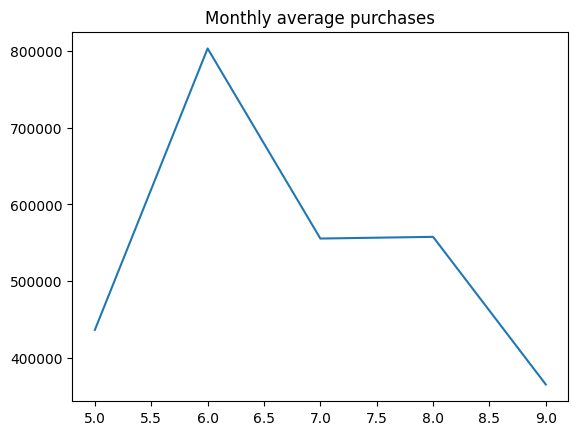

In [72]:
## Hourly purchases 
grouped_by_month = train_df.groupby('Month')['is_buy'].sum().reset_index()
plt.plot(grouped_by_month['Month'],grouped_by_month['is_buy'])
plt.title('Monthly average purchases')